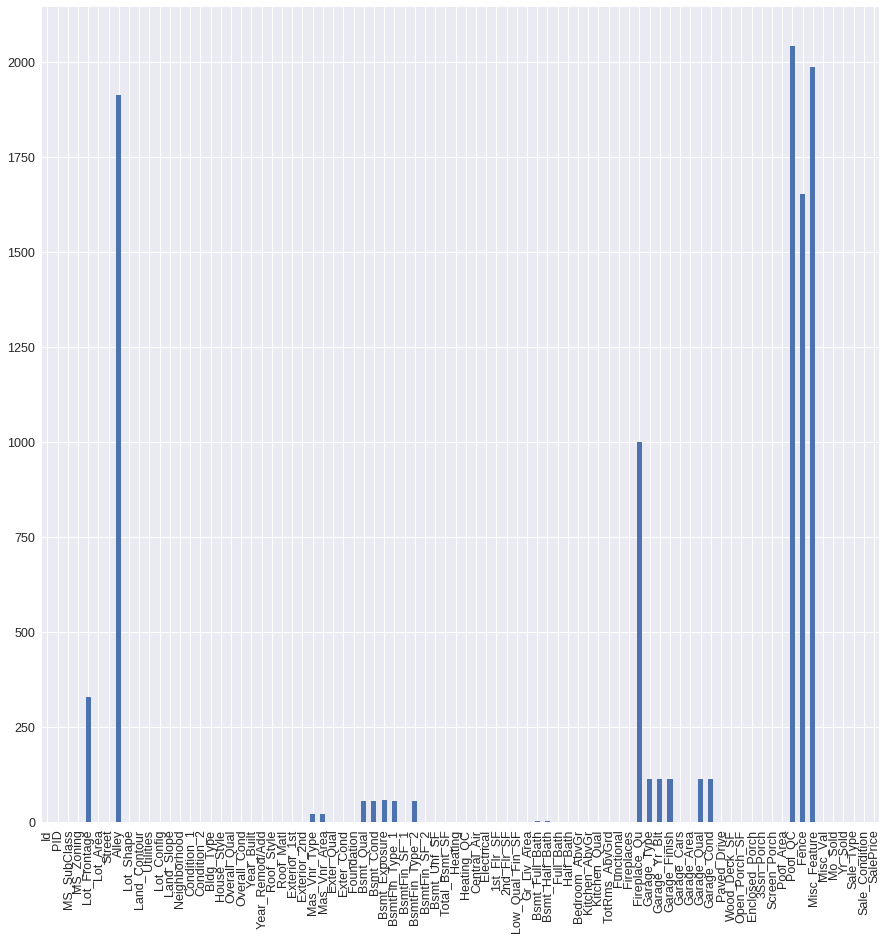

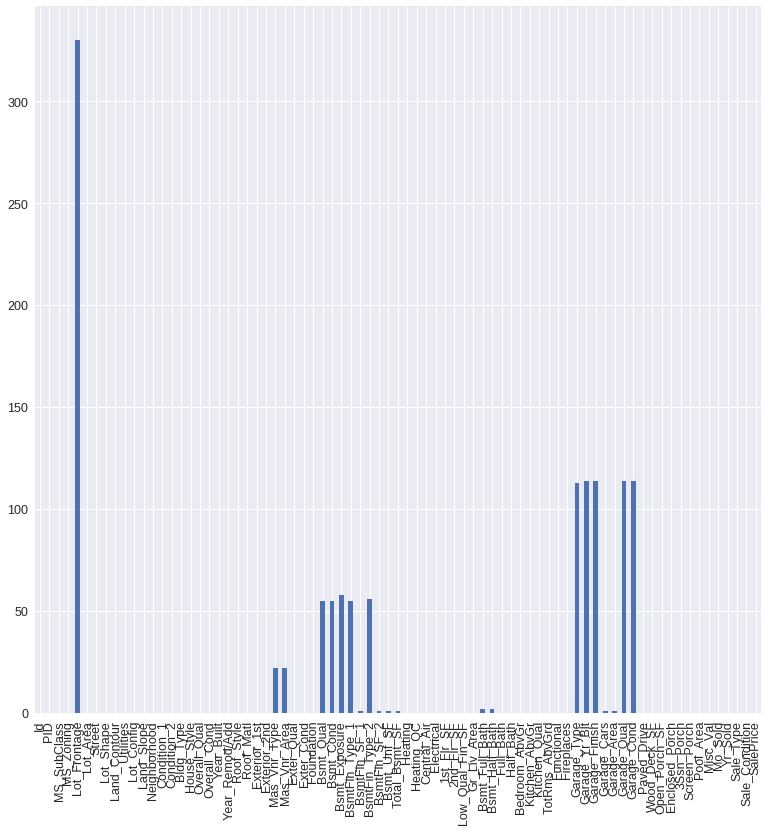

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, Imputer
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
ames_data = pd.read_csv("train.csv")

ames_data.columns = ames_data.columns.map(lambda x: str(x.replace(' ', '_')))

missing_data = ames_data.isnull().sum()

fig, ax = plt.subplots(figsize=(15,15))
missing_data.plot(kind = 'bar')

ames_data = ames_data.drop(["Alley",'Fireplace_Qu','Pool_QC','Fence', 'Misc_Feature'], axis = 1)

missing_data = ames_data.isnull().sum()

fig, ax = plt.subplots(figsize=(13,13))
missing_data.plot(kind = 'bar')

In [20]:
ames_data = ames_data.dropna(axis = 0, how = 'any')

In [21]:
#clean up all the string data. 

def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace = True)
string_cleaning(ames_data)

string_cleaning_tf = FunctionTransformer(string_cleaning, validate=False)
ames_data.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
1,544,531379050,60,RL,43.000,11492,1,IR1,Lvl,4,...,0,0,0,0,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.000,7922,1,Reg,Lvl,4,...,0,0,0,0,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.000,9802,1,Reg,Lvl,4,...,0,0,0,0,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.000,14235,1,IR1,Lvl,4,...,0,0,0,0,0,3,2010,WD,Normal,138500
5,138,535126040,20,RL,137.000,16492,1,IR1,Lvl,4,...,0,0,0,0,0,6,2010,WD,Normal,190000


In [22]:
ames_data["Total_SF"] = ames_data['Gr_Liv_Area'] + ames_data["Total_Bsmt_SF"] + ames_data["Garage_Area"] + ames_data['Wood_Deck_SF']\
    + ames_data["Open_Porch_SF"] + ames_data['Enclosed_Porch'] + ames_data['3Ssn_Porch'] + ames_data['Screen_Porch']\
    + ames_data['Pool_Area']

ames_data["Total_Bathrooms"] = ames_data['Bsmt_Full_Bath'] + ames_data['Bsmt_Half_Bath'] + ames_data['Full_Bath'] + ames_data['Half_Bath']

ames_data['Quality_Average_5'] = (ames_data['Exter_Qual'] + ames_data['Exter_Cond'] + ames_data['Bsmt_Qual'] + ames_data['Bsmt_Cond'] + ames_data['Bsmt_Exposure'] + ames_data['BsmtFin_Type_1'] + ames_data['BsmtFin_Type_2'] + ames_data['Heating_QC'] + ames_data['Kitchen_Qual'] + ames_data['Garage_Cond'] + ames_data['Garage_Qual']).mean()

ames_data['Quality_Average_10'] = (ames_data["Overall_Qual"] + ames_data['Overall_Cond']).mean()

Get Dummies on the entire data set

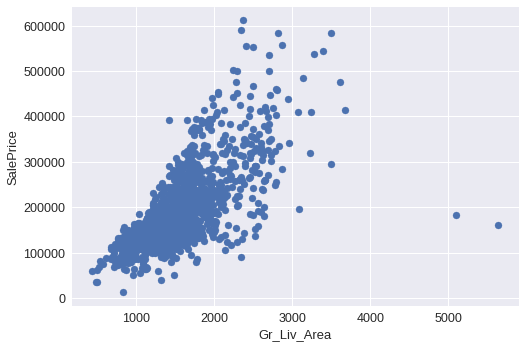

In [23]:
fig, ax = plt.subplots()
ax.scatter(ames_data['Gr_Liv_Area'], ames_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr_Liv_Area', fontsize=13)
plt.show()

In [24]:
ames_data = ames_data.drop(ames_data[(ames_data['Gr_Liv_Area']>4000) & (ames_data['SalePrice']<300000)].index)

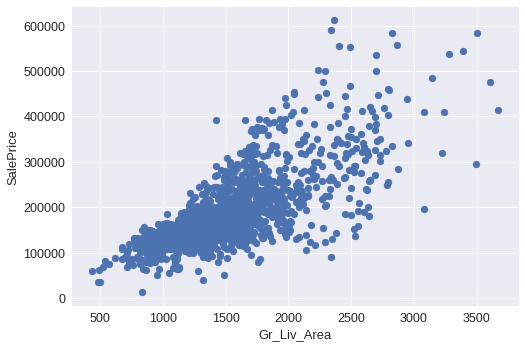

In [25]:
fig, ax = plt.subplots()
ax.scatter(ames_data['Gr_Liv_Area'], ames_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('Gr_Liv_Area', fontsize=13)
plt.show()

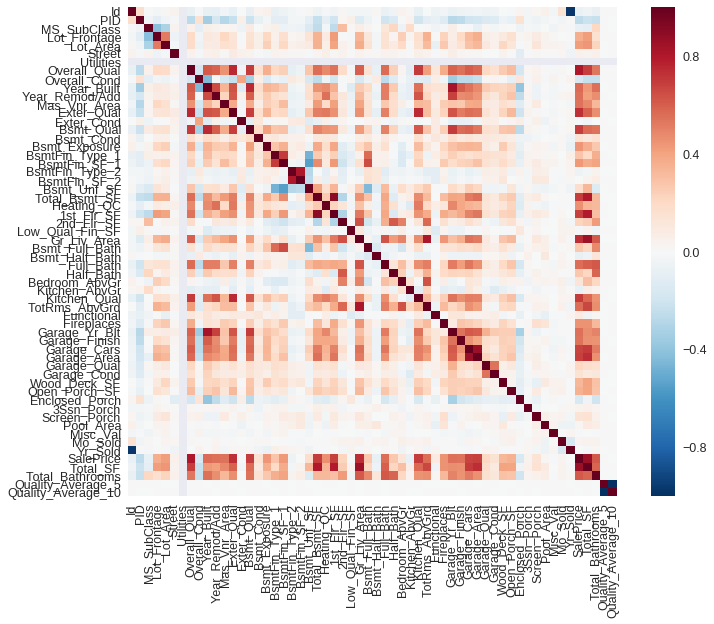

In [26]:
#correlation matrix
corrmat = ames_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

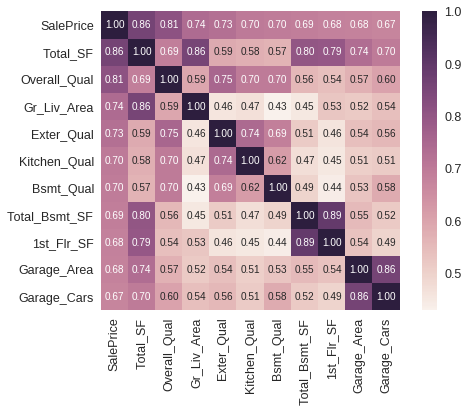

In [27]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [28]:
ames_data["Lot_Frontage"] = ames_data.groupby("Neighborhood")["Lot_Frontage"].transform(lambda x: x.fillna(x.median()))

In [29]:
def garage_cleaner(df):
    for col in ('Garage_Yr_Blt', 'Garage_Area', 'Garage_Cars'): 
        df[col] = df[col].fillna(0)
        
garage_cleaner(ames_data)

In [30]:
def no_basement(df):
    for col in ['BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF','Total_Bsmt_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']:
        df[col] = df[col].fillna((0))
        
no_basement(ames_data)

In [31]:
ames_data = ames_data.dropna(axis = 0, how = 'any')

In [32]:
ames_data.corr()['SalePrice'].sort_values(ascending = False)

SalePrice             1.000
Total_SF              0.861
Overall_Qual          0.811
Gr_Liv_Area           0.740
Exter_Qual            0.728
Kitchen_Qual          0.703
Bsmt_Qual             0.695
Total_Bsmt_SF         0.691
1st_Flr_SF            0.683
Garage_Area           0.681
Garage_Cars           0.674
Total_Bathrooms       0.615
Year_Built            0.568
Full_Bath             0.561
TotRms_AbvGrd         0.556
Garage_Yr_Blt         0.551
Year_Remod/Add        0.548
Garage_Finish         0.545
Mas_Vnr_Area          0.544
Heating_QC            0.454
Fireplaces            0.448
Bsmt_Exposure         0.442
BsmtFin_SF_1          0.433
Lot_Area              0.419
Lot_Frontage          0.366
Open_Porch_SF         0.353
Wood_Deck_SF          0.330
BsmtFin_Type_1        0.288
Bsmt_Full_Bath        0.270
Half_Bath             0.266
2nd_Flr_SF            0.226
Garage_Qual           0.208
Bsmt_Unf_SF           0.187
Bsmt_Cond             0.156
Garage_Cond           0.141
Screen_Porch        

In [33]:
from scipy import stats
from scipy.stats import norm, skew
numeric_feats = ames_data.dtypes[ames_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = ames_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



Skew in numerical features: 



,Skew
Misc_Val,19.913
Pool_Area,18.377
Low_Qual_Fin_SF,14.491
3Ssn_Porch,12.394
Kitchen_AbvGr,6.743
BsmtFin_SF_2,4.156
Lot_Area,3.973
Bsmt_Half_Bath,3.769
Screen_Porch,3.643
Enclosed_Porch,2.980


# USE IN FINAL

In [38]:
y = ames_data["SalePrice"]

features = ['Total_SF', 'Overall_Qual', 'Exter_Qual', 'Total_Bathrooms', 'Kitchen_Qual', 'TotRms_AbvGrd', "Year_Remod/Add"]

X = ames_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [39]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
])

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lasso__max_iter' : [3000,4000],
    'lasso__alpha': np.arange(.99, 1., .0001)
    
}

gs_lasso = GridSearchCV(pipe, param_grid=params)
gs_lasso.fit(X_train, y_train)
print(gs_lasso.best_score_)
gs_lasso.best_params_

0.905334141336


{'imputer__strategy': 'mean',
 'lasso__alpha': 0.99999999999999889,
 'lasso__max_iter': 4000}

In [40]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

ridge = Ridge()

pipe = Pipeline([
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('ridge', ridge)
])

params = {
    
    'ridge__max_iter': [500],
    'ridge__alpha' : np.arange(1.79, 1.9,.00001),
    'imputer__strategy': ['mean', 'median', 'most_frequent']
}

gs_ridge = GridSearchCV(pipe, param_grid=params)
gs_ridge.fit(X_train, y_train)
print(gs_ridge.best_score_)
gs_ridge.best_params_

0.907732625506


{'imputer__strategy': 'mean',
 'ridge__alpha': 1.815330000000166,
 'ridge__max_iter': 500}

In [41]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

enet = ElasticNet()

pipe = Pipeline([
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('enet', enet)
])

params = {}

gs_enet = GridSearchCV(pipe, param_grid=params)
gs_enet.fit(X_train, y_train)
print(gs_enet.best_score_)
gs_enet.best_params_

0.881724493078


{}

In [42]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace = True)
string_cleaning(test)

In [55]:
test["Total_SF"] = test['Gr_Liv_Area'] + test["Total_Bsmt_SF"] + test["Garage_Area"] + test['Wood_Deck_SF']\
    + test["Open_Porch_SF"] + test['Enclosed_Porch'] + test['3Ssn_Porch'] + test['Screen_Porch']\
    + test['Pool_Area']

test["Total_Bathrooms"] = test['Bsmt_Full_Bath'] + test['Bsmt_Half_Bath'] + test['Full_Bath'] + test['Half_Bath']


Xs_test = test[features]

In [56]:
Xs_test.head()

,Total_SF,Overall_Qual,Exter_Qual,Total_Bathrooms,Kitchen_Qual,TotRms_AbvGrd,Year_Remod/Add
Id,,,,,,,
2658,3560.000,6,3,2.000,2,9,1950
2718,4684.000,5,3,2.000,3,10,1977
2414,2700.000,7,4,4.000,4,7,2006
1989,2600.000,5,4,1.000,3,5,2006
625,3563.000,6,3,3.000,3,6,1963


In [57]:
predictions_1 = np.exp(gs_ridge.predict(Xs_test))
predictions_2 = np.exp(gs_lasso.predict(Xs_test))
predictions_3 = np.exp(gs_enet.predict(Xs_test))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
test['SalePrice'] = predictions_1

test[['SalePrice']].to_csv('submission_28.csv', index=True)

In [49]:
test['SalePrice'] = predictions_2

test[['SalePrice']].to_csv('submission_29.csv', index=True)

In [50]:
test['SalePrice'] = predictions_3

test[['SalePrice']].to_csv('submission_30.csv', index=True)

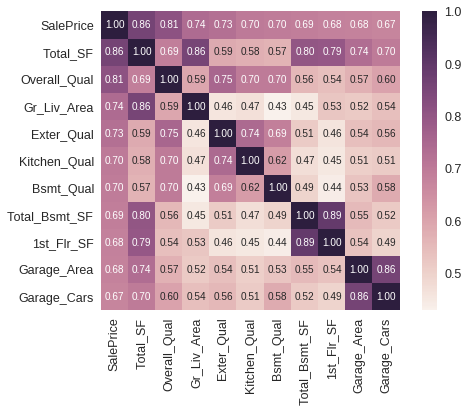

In [64]:
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(ames_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [63]:
ames_data = pd.get_dummies(ames_data)
ames_data.shape

(1554, 217)